In [1]:
from moduels import algorithms
import pandas as pd
#import numpy as np
#import scipy
#from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
import seaborn as sns

from moduels import parseCSVtoDataset as parser
#import csv
#import time
#import datetime
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Prepering The Data

In [18]:
parser.brazilian_houses_to_data_set("data/brazilian_houses.csv", "datasets/brazilian_houses_dataset.csv")
parser.COVID_symptoms_to_data_set("data/COVID_symptoms.csv", "datasets/COVID_symptoms_dataset.csv")
parser.goodreads_books_to_data_set("data/goodreads_books.csv", "datasets/goodreads_books_dataset.csv")
parser.Jan_flight_delay_to_data_set("data/jan_flight_delay.csv", "datasets/jan_flight_delay_dataset.csv")

In [19]:
parser.copy_without_header("datasets/brazilian_houses_dataset.csv", "datasets_no_headers/brazilian_houses_dataset_no_header.csv")
parser.copy_without_header("datasets/COVID_symptoms_dataset.csv", "datasets_no_headers/COVID_symptoms_dataset_no_header.csv")
parser.copy_without_header("datasets/goodreads_books_dataset.csv", "datasets_no_headers/goodreads_books_dataset_no_header.csv")
parser.copy_without_header("datasets/jan_flight_delay_dataset.csv", "datasets_no_headers/jan_flight_delay_dataset_no_header.csv")

# Brazilian Houses - Use Example

## Tree Algorithm

Notes:
- The dataset should contain a header
- The dataset should not contain an index

In [20]:
old_dataset_path = "datasets_no_headers/brazilian_houses_dataset_no_header.csv"
new_dataset_path = "datasets_cleaned/brazilian_houses_dataset_no_header_cleaned.csv"
delimiter = ','
metric = "euclidean"
k = 5
n = 1000

tree_algorithm = algorithms.TreeCleaningAlgorithm(old_dataset_path, delimiter, metric, k, n)
outlier_indices = tree_algorithm.get_outliers_indices()
tree_algorithm.copy_without_outliers(new_dataset_path)

## Outlier Visualiztion

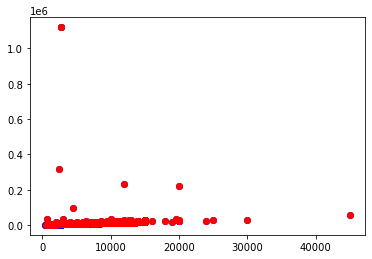

In [21]:
tree_algorithm.visualize_outliers(outlier_indices, [[8, 11]])

## Experimental Results

#### Dataset settings

In [22]:
path_houses = "datasets/brazilian_houses_dataset.csv"
houses_y = "total"
houses_col = ['area', 'rooms', 'bathroom', 'parkingSpaces', 'floor', 'animal',
              'furniture', 'hoa', 'rentAmount', 'propertyTax', 'fireInsurance', 'total']
id_name = None

#### Reading the csv

In [33]:
dtf_houses = parser.read_csv_to_df(path_houses, id_name, houses_col)
dtf_clean_houses = pd.read_csv(new_dataset_path, header=None, low_memory=False)
dtf_clean_houses.columns = houses_col

#### Describe Table - Original

In [34]:
dtf_houses.describe()

,area,rooms,bathroom,parkingSpaces,floor,animal,furniture,hoa,rentAmount,propertyTax,fireInsurance,total
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,0.777778,0.243734,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,0.415759,0.429354,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.000000,0.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.000000,1.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


#### Describe Table - Cleaned

In [35]:
dtf_clean_houses.describe()

,area,rooms,bathroom,parkingSpaces,floor,animal,furniture,hoa,rentAmount,propertyTax,fireInsurance,total
count,9692.000000,9692.000000,9692.00000,9692.000000,9692.000000,9692.000000,9692.000000,9692.000000,9692.000000,9692.000000,9692.000000,9692.000000
mean,120.669728,2.388465,2.03343,1.420553,4.884544,0.772596,0.236071,715.272802,3341.562835,217.832233,45.996698,4320.839455
std,103.680561,1.123406,1.23918,1.438228,5.991186,0.419177,0.424688,737.682894,2758.010742,286.262611,39.607031,3345.010530
min,11.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,54.000000,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000,140.000000,1500.000000,33.000000,20.000000,1956.000000
50%,82.000000,2.000000,2.00000,1.000000,3.000000,1.000000,0.000000,500.000000,2470.000000,105.000000,33.000000,3235.000000
75%,150.000000,3.000000,3.00000,2.000000,8.000000,1.000000,0.000000,1000.000000,4200.000000,291.000000,58.000000,5523.000000
max,1000.000000,13.000000,10.00000,10.000000,301.000000,1.000000,1.000000,4100.000000,15000.000000,2500.000000,267.000000,20290.000000


#### Boxplot - Original

<AxesSubplot:xlabel='area'>

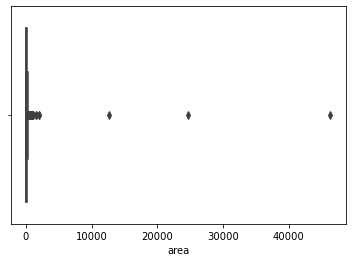

In [36]:
sns.boxplot(dtf_houses.area)

#### Boxplot - Cleaned

<AxesSubplot:xlabel='area'>

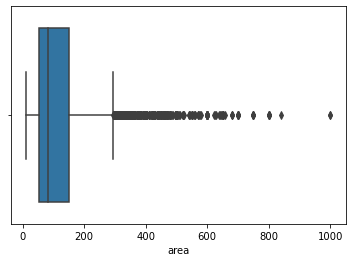

In [37]:
sns.boxplot(dtf_clean_houses.area)

#### Linear Regression Model

In [38]:
# split dataset to train and test set
dtf_train, dtf_test = train_test_split(dtf_houses, test_size=0.25)

# clean train set and parse to a dataframe
dft_train_clean = algorithms.k_mean_data_cleaning("datasets/brazilian_houses_dataset.csv", dtf_train)
dft_train_clean = pd.DataFrame(dft_train_clean, columns=houses_col)

# parse origin train and test to a dataframe
dtf_train = pd.DataFrame(dtf_train, columns=houses_col)
dtf_test = pd.DataFrame(dtf_test, columns=houses_col)

# create x and y for all the sets
X_train_clean = dft_train_clean.drop(columns=[houses_y], axis=1)
X_train = dtf_train.drop(columns=[houses_y], axis=1)
X_test = dtf_test.drop(columns=[houses_y], axis=1)
y_train_clean = dft_train_clean[houses_y]
y_train = dtf_train[houses_y]
y_test = dtf_test[houses_y]
y_test = list(map(round, y_test))

#create linear regration model
model = LinearRegression()

#train the model and predict y_hat for the origin and clean tain set
prediction = model.fit(X_train, y_train).predict(X_test)
prediction = list(map(round, prediction))

prediction_clean = model.fit(X_train_clean, y_train_clean).predict(X_test)
prediction_clean = list(map(round, prediction_clean))

#### r2 score - Original 

In [39]:
r2_score(y_test, prediction)

0.9999998762312488

#### r2 score - Cleaned

In [40]:
r2_score(y_test, prediction_clean)

0.9999997802575095

#### Accuracy - Original 

In [41]:
counter = 0
for y, y_hat in zip(y_test, prediction):
    if (round(y) == round(y_hat)):
        counter += 1
counter * 100 / len(prediction)

87.0183314627759

#### Accuracy - Cleaned

In [42]:
#compute the accuracy for the clean
counter = 0
for y, y_hat in zip(y_test, prediction_clean):
    if (round(y) == round(y_hat)):
        counter += 1
counter * 100 / len(prediction)

85.93340815563037